# Spectra across multiple logfiles

This is an example of generating a single spectrum over several log files
This may be convienent when trying to solve for a large number states in
a dense region of the spectrum (like XAS, for example)

`lrspectrum` must be installed (or a symbolic link to `../lrspectrum`
must be included in the calling directory)

In [1]:
import os
import re

import matplotlib.pyplot as plt

from lrspectrum import LRSpectrum

LRSpectrum supports logfiles listed as multiple params

In [2]:
lr0 = LRSpectrum('example_1.log', 'example_2.log', 'example_3.log',
                 name='LogParams')

Or as a list of logfiles.

In [3]:
logs = ['example_1.log', 'example_2.log', 'example_3.log']
lr1 = LRSpectrum(logs, name='LogList')

The second is particularly convenient when your log files are systematically
named. One option to take advantage of this is as follows.

In [4]:
lglst = []
for fil in os.listdir('.'):
    rexp = re.compile('example_\d.log')
    if rexp.match(fil) is not None:
        lglst.append(fil)

lr2 = LRSpectrum(lglst, name='RELogs')

All methods provide the same spectrum

In [5]:
lr0.gen_spect()
lr1.gen_spect()
lr2.gen_spect()

Spectral range not specified... Automatically generating spectral range
Spectral range not specified... Automatically generating spectral range
Spectral range not specified... Automatically generating spectral range


You can specify which axis to plot on with ax

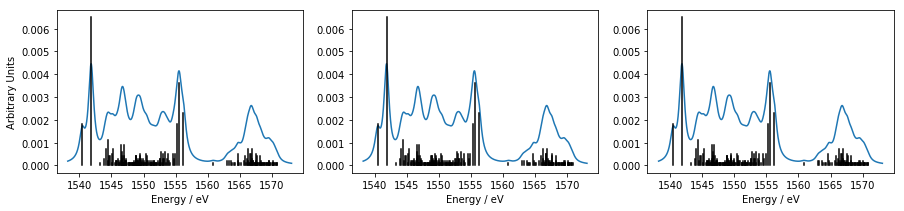

In [6]:
f, axs = plt.subplots(ncols=3, sharex=True, figsize=(15,3))
lr0.plot(ax=axs[0])
lr1.plot(ax=axs[1], yLabel=None)
lr2.plot(ax=axs[2], yLabel=None, show=True)